In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data(json_filename, incident_number):

    df_categorised = pd.read_json(json_filename)
    df_uncategorised = pd.read_json('data/uncategorised.json')

    # Get status of incident
    status = df_categorised['status']
    status = status[incident_number]

    # Get detailed info
    accel_df = df_categorised['detail']
    detail_dict = accel_df[incident_number]

    # Less detailed data
    gps_df = df_categorised['journey']
    journey_dict = gps_df[incident_number]

    # Zoomed out data, has long term speed and accelerometer data
    zoomed_out_df = pd.DataFrame.from_dict(journey_dict)

    # Zoomed in data, use to get the speed in smaller interval
    zoomed_in_df = pd.DataFrame.from_dict(detail_dict)

    # Extract the higher resolution accelerometer data for the crash
    forces = zoomed_in_df['forces']
    zoomed_in_tilts = []
    for second in forces:
        force_1 = pd.DataFrame.from_dict(second)
        zoomed_in_tilts.append(force_1)

    zoomed_in_tilts = pd.concat(zoomed_in_tilts)
    zoomed_in_tilts = zoomed_in_tilts.rename(columns={'index':'timeoffset'})

    linspace_1 = np.linspace(-6, 2.875, 72)
    zoomed_in_tilts['timeoffset'] = linspace_1

    return [zoomed_in_df, zoomed_out_df, zoomed_in_tilts, status]


Possible (Correct)


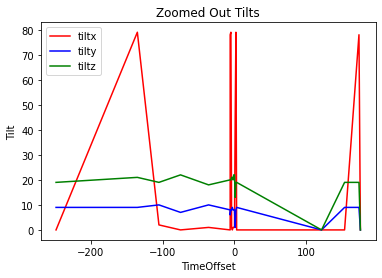

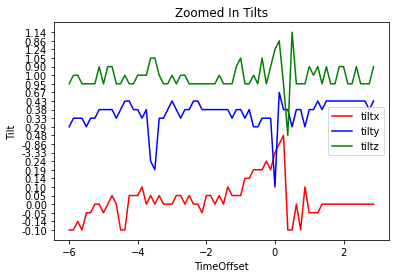

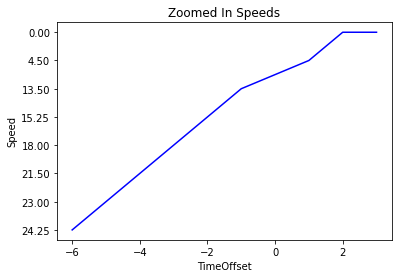

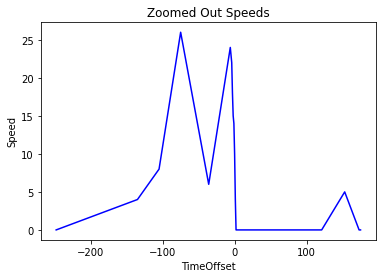

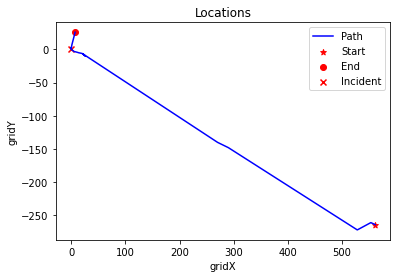

In [136]:
def plot_tilts(df, title):
    plt.plot(df['timeoffset'], df['tiltx'], label='tiltx', color='red')
    plt.plot(df['timeoffset'], df['tilty'], label='tilty', color='blue')
    plt.plot(df['timeoffset'], df['tiltz'], label='tiltz', color='green')
    plt.title(title), plt.xlabel('TimeOffset'), plt.ylabel('Tilt')
    plt.legend(loc='best')
    plt.show()

def plot_speeds(df, title):
    plt.plot(df['timeoffset'], df['speed'], label='Speed', color='blue')
    plt.title(title), plt.xlabel('TimeOffset'), plt.ylabel('Speed')
    plt.show()

def plot_grid(df, title):
    X = df['gridx']
    Y = df['gridy']
    plt.plot(X, Y, label='Path', color='blue')
    plt.scatter(X[0], Y[0], label='Start', marker='*', color='red')
    plt.scatter(X.iloc[-1], Y.iloc[-1], label='End', marker='o', color='red')
    plt.scatter(0,0, label='Incident', color='red', marker='x')
    plt.legend(loc='best')
    plt.title(title), plt.xlabel('gridX'), plt.ylabel('gridY')
    plt.show()

# Change the number of the second argument to get data for a different incidence
data = get_data('data/categorised.json', 2)

zoomed_in_df = data[0]
zoomed_out_df = data[1]
zoomed_in_tilts = data[2]
status = data[3]

# Tells us if crash or not
print(status)

# Plotting
plot_tilts(data[1], 'Zoomed Out Tilts')
plot_tilts(data[2], 'Zoomed In Tilts')
plot_speeds(data[0], 'Zoomed In Speeds')
plot_speeds(data[1], 'Zoomed Out Speeds')
plot_grid(data[1], 'Locations')
